# Hyperspectral benchmark dataset on soil moisture

A little background about the data before we look at it.

Hyperspectral and soil-moisture data is collected from a field campaign.

This dataset was measured in a five-day field campaign in May 2017 in Karlsruhe, Germany. An undisturbed soil sample is the centerpiece of the measurement setup. The soil sample consists of bare soil without any vegetation and was taken in the area near Waldbronn, Germany.

The following sensors were deployed:

- Cubert UHD 285 **hyperspectral** snapshot camera recording 50 by 50 images with 125 spectral bands ranging from 450 nm to 950 nm and a spectral resolution of 4 nm.
- TRIME-PICO time-domain reflectometry (TDR) sensor in a depth of 2 cm measuring the **soil moisture** in percent.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('soilmoisture_dataset.csv')

In [3]:
df.head()

,index,datetime,soil_moisture,soil_temperature,454,458,462,466,470,474,478,482,486,490,494,498,502,506,510,514,518,522,526,530,534,538,542,546,550,554,558,562,566,570,574,578,582,586,590,594,...,794,798,802,806,810,814,818,822,826,830,834,838,842,846,850,854,858,862,866,870,874,878,882,886,890,894,898,902,906,910,914,918,922,926,930,934,938,942,946,950
0,0,2017-05-23 14:06:17,33.51,34.8,0.082131,0.055863,0.050047,0.047925,0.047498,0.046464,0.046669,0.046834,0.047469,0.048608,0.049343,0.050321,0.051308,0.053237,0.054277,0.055914,0.057526,0.059340,0.060957,0.062543,0.064105,0.066158,0.067752,0.069538,0.071269,0.072890,0.075050,0.077273,0.078615,0.080797,0.082322,0.084873,0.086526,0.087896,0.089299,0.090783,...,0.145595,0.145843,0.146072,0.146550,0.146754,0.147211,0.147590,0.147860,0.148043,0.148273,0.148168,0.148306,0.148695,0.149169,0.149621,0.149989,0.150042,0.150073,0.150504,0.150803,0.150936,0.150901,0.150922,0.151156,0.151157,0.151944,0.152416,0.152719,0.153032,0.152900,0.152845,0.152615,0.152927,0.154240,0.155018,0.154725,0.154682,0.154275,0.153477,0.153929
1,1,2017-05-23 14:08:17,33.49,35.2,0.079510,0.055326,0.049116,0.047579,0.046745,0.046833,0.046329,0.047021,0.047660,0.048272,0.049086,0.050255,0.051465,0.052758,0.054272,0.055413,0.057245,0.058795,0.060666,0.062129,0.063881,0.065639,0.067651,0.069088,0.070921,0.072938,0.074584,0.076384,0.078716,0.080225,0.082117,0.083903,0.085882,0.087423,0.088400,0.090014,...,0.144398,0.144630,0.145129,0.145314,0.145616,0.146163,0.146341,0.146592,0.146502,0.146817,0.147310,0.147750,0.147913,0.147479,0.147233,0.147689,0.148296,0.149031,0.149187,0.149416,0.149423,0.149916,0.149966,0.150217,0.150538,0.151034,0.151720,0.152391,0.152629,0.152848,0.152715,0.153102,0.153551,0.153590,0.153688,0.153370,0.154021,0.155543,0.156220,0.156727
2,2,2017-05-23 14:10:17,33.46,35.4,0.080599,0.054065,0.049150,0.047537,0.046525,0.046032,0.046276,0.046886,0.047230,0.048611,0.049242,0.049904,0.051134,0.052349,0.053945,0.055273,0.057153,0.059028,0.060561,0.061880,0.063493,0.066001,0.067201,0.069135,0.071210,0.072657,0.074421,0.076661,0.078280,0.080071,0.082386,0.083938,0.085441,0.086862,0.088657,0.090307,...,0.144020,0.144574,0.145234,0.145732,0.146030,0.146272,0.146241,0.146188,0.146411,0.146690,0.146826,0.147014,0.147254,0.147352,0.147695,0.148217,0.148582,0.148506,0.148827,0.149458,0.149506,0.149884,0.149838,0.149699,0.149895,0.150394,0.151122,0.151932,0.152294,0.152802,0.152362,0.152158,0.153204,0.153942,0.154610,0.154629,0.155609,0.155545,0.154884,0.154485
3,3,2017-05-23 14:12:17,33.33,35.0,0.078024,0.054972,0.049052,0.047920,0.046883,0.046775,0.046835,0.046996,0.047565,0.048465,0.048690,0.049916,0.051437,0.052027,0.054373,0.056050,0.057311,0.058920,0.060888,0.062372,0.064291,0.065244,0.067219,0.068842,0.070901,0.073285,0.074840,0.076867,0.078547,0.080383,0.081995,0.083849,0.085804,0.087126,0.088588,0.090112,...,0.144493,0.144867,0.145372,0.146214,0.146422,0.146825,0.146741,0.147157,0.147298,0.147334,0.147530,0.147954,0.147926,0.147875,0.148162,0.148225,0.148359,0.148621,0.148995,0.148676,0.149480,0.149579,0.149904,0.150083,0.150628,0.150957,0.151445,0.151797,0.152599,0.153193,0.153281,0.153990,0.154499,0.155012,0.154691,0.154643,0.155405,0.155918,0.157645,0.157824
4,4,2017-05-23 14:14:17,33.32,35.3,0.079973,0.055335,0.049314,0.047373,0.047028,0.046963,0.046763,0.047051,0.048083,0.048178,0.048974,0.050070,0.051606,0.053044,0.054380,0.055813,0.057545,0.059343,0.061065,0.062529,0.064171,0.065473,0.067356,0.069320,0.071357,0.073242,0.074871,0.076984,0.078913,0.080763,0.082440,0.084656,0.086398,0.087801,0.089326,0.090583,...,0.145003,0.145700,0.146395,0.146758,0.146924,0.147060,0.147056,0.147302,0.147415,0.147568,0.148043,0.147987,0.147911,0.148019,0.148351,0.148772,0.149200,0.149460,0.149814,0.150180,0.150412,0.151085,0.151388,0.151563,0.151885,0.151788,0.151988,0.152256,0.152441,0.152833,0.152803,0.153085,0.153295,0.154230,0.155071,0.155624,0.156504,0.156859,0.156634,0.156176


Let me tell you my first impression by taking a quick look at the first few rows.

1. This data is not made for general analysis. Since this is a part of a research paper it requires domain knowledge to understand what actually those bands(454, 458, 462 ....) mean

2. But we can analyse the change of soil musture and soil temperature over time

3. The timestamps are increasing at a rate of 2 minutes

4. index column is pretty much as useless as me in any DS competition. :(

In [0]:
#dropping the index column :)

df.drop('index', axis=1, inplace=True)

**So I decided to read some more on what are these "hyperspectral bands".**


**So I went for a quick google search and this is what I found:**

Hyperspectral deals with imaging narrow spectral bands over a continuous spectral range, producing the spectra of all pixels in the scene. A sensor with only 20 bands can also be hyperspectral when it covers the range from 500 to 700 nm with 20 bands each 10 nm wide.

So basically the goal is to obtain the spectrum for each pixl in an image.

It is still not totally clear to me but I think I can at least try to see how the spectrum is varying for each band over time.

In [5]:
#checking shape of data

df.shape

(679, 128)

In [6]:
#checking for null values

df.isnull().sum()

datetime            0
soil_moisture       0
soil_temperature    0
454                 0
458                 0
                   ..
934                 0
938                 0
942                 0
946                 0
950                 0
Length: 128, dtype: int64

No null values. Obviously because this is a part of a research paper. ^_^

lets take a quick look at the description of the data

In [7]:
df.describe()

,soil_moisture,soil_temperature,454,458,462,466,470,474,478,482,486,490,494,498,502,506,510,514,518,522,526,530,534,538,542,546,550,554,558,562,566,570,574,578,582,586,590,594,598,602,...,794,798,802,806,810,814,818,822,826,830,834,838,842,846,850,854,858,862,866,870,874,878,882,886,890,894,898,902,906,910,914,918,922,926,930,934,938,942,946,950
count,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,...,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000,679.000000
mean,31.568336,37.498380,0.105377,0.073045,0.065070,0.062629,0.061873,0.061586,0.061607,0.061967,0.062717,0.063885,0.064952,0.066340,0.067933,0.069771,0.071613,0.073437,0.075359,0.077532,0.079618,0.081686,0.083867,0.086119,0.088290,0.090480,0.092801,0.095198,0.097555,0.099823,0.102091,0.104403,0.106557,0.108617,0.110573,0.112525,0.114377,0.116042,0.117552,0.118990,...,0.178819,0.179477,0.180028,0.180516,0.180830,0.181101,0.181328,0.181467,0.181647,0.181822,0.182071,0.182330,0.182541,0.182823,0.183130,0.183488,0.183888,0.184290,0.184584,0.184813,0.185019,0.185228,0.185426,0.185700,0.186041,0.186283,0.186508,0.186747,0.187000,0.187208,0.187371,0.187561,0.187706,0.187668,0.187632,0.187646,0.187652,0.187536,0.187309,0.187045
std,3.645354,4.660603,0.028343,0.018428,0.016486,0.016021,0.016056,0.016139,0.016306,0.016505,0.016769,0.017010,0.017449,0.017910,0.018393,0.018861,0.019444,0.019967,0.020395,0.020846,0.021327,0.021900,0.022487,0.023038,0.023596,0.024118,0.024651,0.025257,0.025845,0.026383,0.026898,0.027438,0.027902,0.028364,0.028841,0.029313,0.029792,0.030166,0.030551,0.030880,...,0.040050,0.040048,0.040073,0.040152,0.040206,0.040243,0.040219,0.040181,0.040122,0.039995,0.039916,0.039854,0.039759,0.039684,0.039622,0.039540,0.039478,0.039443,0.039393,0.039339,0.039255,0.039203,0.039113,0.039067,0.038988,0.038943,0.038854,0.038755,0.038678,0.038639,0.038583,0.038582,0.038583,0.038572,0.038650,0.038809,0.038935,0.039045,0.039156,0.039371
min,25.500000,26.400000,0.035041,0.032346,0.034085,0.037048,0.037497,0.039109,0.037140,0.038140,0.037672,0.042700,0.043236,0.045463,0.046543,0.049984,0.051566,0.053965,0.055812,0.057585,0.058909,0.060316,0.062379,0.064474,0.066074,0.067556,0.069387,0.070828,0.073035,0.074973,0.076729,0.078358,0.080522,0.081675,0.083636,0.085261,0.085987,0.086844,0.088902,0.089331,...,0.138354,0.138806,0.139697,0.140268,0.141350,0.141492,0.141824,0.142403,0.141955,0.142259,0.142658,0.143029,0.143579,0.144376,0.144950,0.145806,0.146190,0.146220,0.146922,0.147254,0.147501,0.147561,0.148075,0.148032,0.148441,0.148863,0.148761,0.148778,0.149589,0.149909,0.149885,0.149585,0.148775,0.147104,0.145400,0.142740,0.142768,0.141997,0.140547,0.138089
25%,28.255000,33.600000,0.083775,0.059958,0.053154,0.050792,0.050016,0.049579,0.049560,0.049691,0.050039,0.050916,0.051700,0.052812,0.054259,0.055861,0.057274,0.058603,0.060035,0.062063,0.063866,0.065599,0.067462,0.069412,0.071049,0.072992,0.074892,0.077014,0.078802,0.080520,0.082696,0.084435,0.086319,0.087926,0.089593,0.091272,0.092778,0.094238,0.095402,0.096702,...,0.150065,0.150702,0.151269,0.151671,0.151816,0.151844,0.152135,0.152642,0.152836,0.152989,0.153252,0.153472,0.153848,0.154104,0.154455,0.154618,0.154921,0.155225,0.155300,0.155593,0.155941,0.156123,0.156

In [8]:
df.tail()

,datetime,soil_moisture,soil_temperature,454,458,462,466,470,474,478,482,486,490,494,498,502,506,510,514,518,522,526,530,534,538,542,546,550,554,558,562,566,570,574,578,582,586,590,594,598,...,794,798,802,806,810,814,818,822,826,830,834,838,842,846,850,854,858,862,866,870,874,878,882,886,890,894,898,902,906,910,914,918,922,926,930,934,938,942,946,950
674,2017-05-26 14:00:10,29.95,40.5,0.095628,0.063323,0.054875,0.052592,0.051657,0.050532,0.050405,0.050442,0.051141,0.051872,0.052354,0.053680,0.054840,0.056830,0.057741,0.059638,0.061500,0.063122,0.064665,0.066805,0.068847,0.070121,0.072707,0.074236,0.076359,0.078316,0.080684,0.082402,0.084621,0.086420,0.088385,0.090083,0.092013,0.093415,0.095166,0.096544,0.098380,...,0.154206,0.155085,0.155164,0.155241,0.155585,0.155784,0.156375,0.156796,0.156720,0.157108,0.157417,0.157557,0.158009,0.158586,0.159077,0.159460,0.158906,0.158852,0.159331,0.159229,0.158987,0.158557,0.159178,0.160146,0.161316,0.161984,0.162384,0.162201,0.162185,0.162791,0.163177,0.163567,0.164741,0.164674,0.164187,0.164769,0.165175,0.165139,0.164672,0.164568
675,2017-05-26 14:02:10,29.85,39.5,0.095172,0.064181,0.054754,0.052329,0.051583,0.051085,0.051120,0.050502,0.051094,0.052233,0.052308,0.053762,0.054846,0.056696,0.058296,0.060081,0.061500,0.063350,0.065200,0.067404,0.068202,0.070503,0.072759,0.074405,0.076045,0.078665,0.080338,0.082750,0.085020,0.086760,0.088853,0.090458,0.092230,0.093741,0.095517,0.096590,0.098362,...,0.153639,0.154292,0.155113,0.155905,0.156367,0.156754,0.157094,0.157130,0.157337,0.157703,0.157868,0.157905,0.158435,0.158469,0.158535,0.158078,0.158103,0.158486,0.159296,0.159774,0.159584,0.160012,0.160319,0.160751,0.161394,0.161534,0.161819,0.161755,0.161749,0.162871,0.163974,0.163969,0.164486,0.164360,0.164200,0.164243,0.164071,0.163975,0.164415,0.165097
676,2017-05-26 14:04:10,29.78,39.5,0.095643,0.064545,0.055754,0.052565,0.052036,0.051648,0.050826,0.050821,0.051343,0.052496,0.052822,0.054256,0.055003,0.056805,0.058176,0.060505,0.061738,0.063750,0.065468,0.066946,0.069445,0.071018,0.073387,0.074835,0.076850,0.078803,0.080938,0.083421,0.085133,0.086959,0.088794,0.091170,0.092686,0.094764,0.095901,0.097368,0.099018,...,0.155619,0.156234,0.156792,0.157170,0.157213,0.157486,0.158066,0.158002,0.158164,0.158271,0.157945,0.157816,0.158031,0.158429,0.158945,0.159464,0.159372,0.159474,0.159476,0.159656,0.159885,0.160317,0.161049,0.161490,0.161867,0.161942,0.162089,0.162161,0.162530,0.163131,0.164781,0.165449,0.165924,0.165939,0.165627,0.164795,0.164872,0.164913,0.165139,0.165224
677,2017-05-26 14:06:10,29.90,39.5,0.095016,0.064233,0.055004,0.052435,0.051800,0.050964,0.051535,0.050993,0.051184,0.052247,0.053057,0.053940,0.055009,0.056978,0.058503,0.060069,0.062154,0.064036,0.065670,0.067107,0.069151,0.070713,0.072399,0.074818,0.076728,0.079022,0.081046,0.083229,0.085398,0.086873,0.088972,0.090886,0.092867,0.094141,0.096358,0.097513,0.099286,...,0.154235,0.155730,0.156515,0.156169,0.156582,0.157050,0.157752,0.158062,0.158143,0.158287,0.158723,0.159083,0.158822,0.158672,0.158788,0.159332,0.160143,0.160563,0.160699,0.160859,0.161078,0.161074,0.161557,0.162057,0.162961,0.163633,0.163406,0.163382,0.163428,0.163795,0.164162,0.164828,0.165642,0.166186,0.166549,0.165808,0.165922,0.166376,0.166403,0.165649
678,2017-05-26 14:08:10,29.75,39.7,0.097682,0.065442,0.056054,0.053890,0.052824,0.051931,0.051529,0.051363,0.052184,0.052733,0.053406,0.055489,0.055641,0.057442,0.058761,0.060168,0.062347,0.064853,0.065865,0.068115,0.069542,0.071324,0.073276,0.075570,0.077349,0.079836,0.081988,0.083641,0.085898,0.087546,0.090099,0.091954,0.092981,0.094954,0.096343,0.098239,0.099583,...,0.155620,0.156564,0.157101,0.157659,0.157795,0.157986,0.157885,0.158103,0.158224,0.158615,0.159080,0.159202,0.159351,0.159460,0.159959,0.159979,0.160388,0.160695,0.161321,0.161718,0.161748,0.162150,0.162502,0.162734,0.162940,0.163265,0.163557,0.163911,0.164593,0.165207,0.165825,0.166198,0.166590,0.167583,0.167872,0.167655,0.167314,0.166546,0.166

Looking at the end of the data it seems that the observation ended on 26th.

So I think what's important in the datetime column are the date, hour, minute and second.

Let's extract that and drop that column.

In [0]:
#conversion to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

In [0]:
#adding new columns
df['date'] = 0
df['hour'] = 0
df['minutes'] = 0
df['seconds'] = 0

for i in range(df.shape[0]):
  df['date'][i] = df['datetime'][i].day
  df['hour'][i] = df['datetime'][i].hour
  df['minutes'][i] = df['datetime'][i].minute
  df['seconds'][i] = df['datetime'][i].second

In [11]:
df.head()

,datetime,soil_moisture,soil_temperature,454,458,462,466,470,474,478,482,486,490,494,498,502,506,510,514,518,522,526,530,534,538,542,546,550,554,558,562,566,570,574,578,582,586,590,594,598,...,810,814,818,822,826,830,834,838,842,846,850,854,858,862,866,870,874,878,882,886,890,894,898,902,906,910,914,918,922,926,930,934,938,942,946,950,date,hour,minutes,seconds
0,2017-05-23 14:06:17,33.51,34.8,0.082131,0.055863,0.050047,0.047925,0.047498,0.046464,0.046669,0.046834,0.047469,0.048608,0.049343,0.050321,0.051308,0.053237,0.054277,0.055914,0.057526,0.059340,0.060957,0.062543,0.064105,0.066158,0.067752,0.069538,0.071269,0.072890,0.075050,0.077273,0.078615,0.080797,0.082322,0.084873,0.086526,0.087896,0.089299,0.090783,0.091937,...,0.146754,0.147211,0.147590,0.147860,0.148043,0.148273,0.148168,0.148306,0.148695,0.149169,0.149621,0.149989,0.150042,0.150073,0.150504,0.150803,0.150936,0.150901,0.150922,0.151156,0.151157,0.151944,0.152416,0.152719,0.153032,0.152900,0.152845,0.152615,0.152927,0.154240,0.155018,0.154725,0.154682,0.154275,0.153477,0.153929,23,14,6,17
1,2017-05-23 14:08:17,33.49,35.2,0.079510,0.055326,0.049116,0.047579,0.046745,0.046833,0.046329,0.047021,0.047660,0.048272,0.049086,0.050255,0.051465,0.052758,0.054272,0.055413,0.057245,0.058795,0.060666,0.062129,0.063881,0.065639,0.067651,0.069088,0.070921,0.072938,0.074584,0.076384,0.078716,0.080225,0.082117,0.083903,0.085882,0.087423,0.088400,0.090014,0.090900,...,0.145616,0.146163,0.146341,0.146592,0.146502,0.146817,0.147310,0.147750,0.147913,0.147479,0.147233,0.147689,0.148296,0.149031,0.149187,0.149416,0.149423,0.149916,0.149966,0.150217,0.150538,0.151034,0.151720,0.152391,0.152629,0.152848,0.152715,0.153102,0.153551,0.153590,0.153688,0.153370,0.154021,0.155543,0.156220,0.156727,23,14,8,17
2,2017-05-23 14:10:17,33.46,35.4,0.080599,0.054065,0.049150,0.047537,0.046525,0.046032,0.046276,0.046886,0.047230,0.048611,0.049242,0.049904,0.051134,0.052349,0.053945,0.055273,0.057153,0.059028,0.060561,0.061880,0.063493,0.066001,0.067201,0.069135,0.071210,0.072657,0.074421,0.076661,0.078280,0.080071,0.082386,0.083938,0.085441,0.086862,0.088657,0.090307,0.091509,...,0.146030,0.146272,0.146241,0.146188,0.146411,0.146690,0.146826,0.147014,0.147254,0.147352,0.147695,0.148217,0.148582,0.148506,0.148827,0.149458,0.149506,0.149884,0.149838,0.149699,0.149895,0.150394,0.151122,0.151932,0.152294,0.152802,0.152362,0.152158,0.153204,0.153942,0.154610,0.154629,0.155609,0.155545,0.154884,0.154485,23,14,10,17
3,2017-05-23 14:12:17,33.33,35.0,0.078024,0.054972,0.049052,0.047920,0.046883,0.046775,0.046835,0.046996,0.047565,0.048465,0.048690,0.049916,0.051437,0.052027,0.054373,0.056050,0.057311,0.058920,0.060888,0.062372,0.064291,0.065244,0.067219,0.068842,0.070901,0.073285,0.074840,0.076867,0.078547,0.080383,0.081995,0.083849,0.085804,0.087126,0.088588,0.090112,0.091645,...,0.146422,0.146825,0.146741,0.147157,0.147298,0.147334,0.147530,0.147954,0.147926,0.147875,0.148162,0.148225,0.148359,0.148621,0.148995,0.148676,0.149480,0.149579,0.149904,0.150083,0.150628,0.150957,0.151445,0.151797,0.152599,0.153193,0.153281,0.153990,0.154499,0.155012,0.154691,0.154643,0.155405,0.155918,0.157645,0.157824,23,14,12,17
4,2017-05-23 14:14:17,33.32,35.3,0.079973,0.055335,0.049314,0.047373,0.047028,0.046963,0.046763,0.047051,0.048083,0.048178,0.048974,0.050070,0.051606,0.053044,0.054380,0.055813,0.057545,0.059343,0.061065,0.062529,0.064171,0.065473,0.067356,0.069320,0.071357,0.073242,0.074871,0.076984,0.078913,0.080763,0.082440,0.084656,0.086398,0.087801,0.089326,0.090583,0.091833,...,0.146924,0.147060,0.147056,0.147302,0.147415,0.147568,0.148043,0.147987,0.147911,0.148019,0.148351,0.148772,0.149200,0.149460,0.149814,0.150180,0.150412,0.151085,0.151388,0.151563,0.151885,0.151788,0.151988,0.152256,0.152441,0.152833,0.152803,0.153085,0.153295,0.154230,0.155071,0.155624,0.156504,0.156859,0.156634,0.156176,23,14,14,17


Okay so now that our data is looking well sorted I will drop the datetime column

In [0]:
df.drop('datetime', axis=1, inplace=True)

Let's differentiate th data based on the dates

In [13]:
df_23 = df[df['date']==23]
df_23.shape

(149, 131)

In [14]:
#lets look at the unique hours at which the data was collected

df_23['hour'].unique()

array([14, 15, 16, 10, 11, 12, 13])

So they started observing at 10 a.m. and continued till 4 p.m. (in whatever time zone they were :)

Lets take a look at how the soil moisture percentage varied in the each of the hours

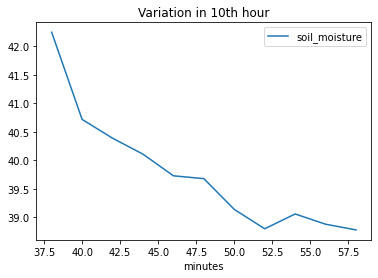

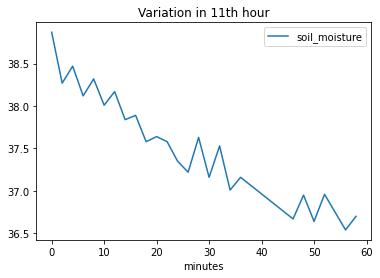

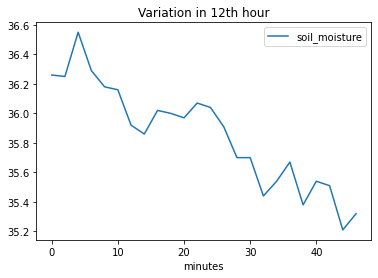

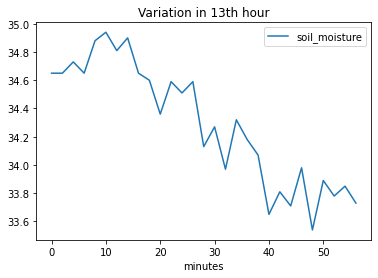

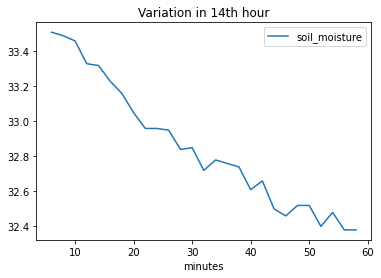

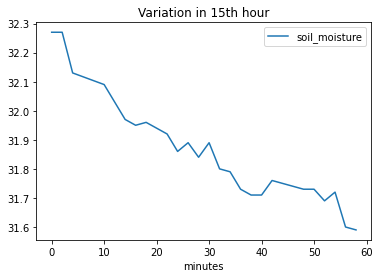

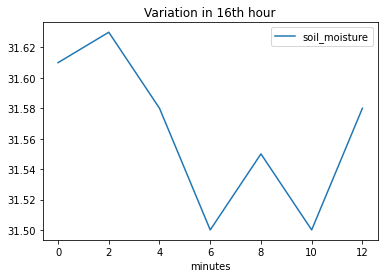

In [15]:
for val in sorted(list(df_23['hour'].unique())):
  filter = df_23['hour']==val

  df_23[filter].plot('minutes', 'soil_moisture')
  plt.title('Variation in {}th hour'.format(val))
  plt.show()

From the above graphs it is very clear that the soil moisture is constantly decreasing throughout the day and there is a continuity found between the hours.

The most interesting graph is the one for the 16th hour. Its variation is pretty strange.

Let's observe another day graphs and see if we find a similar pattern in the data

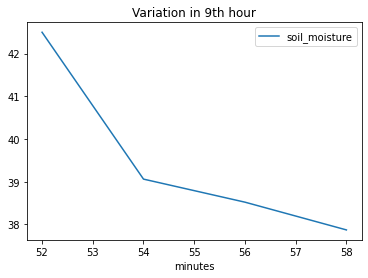

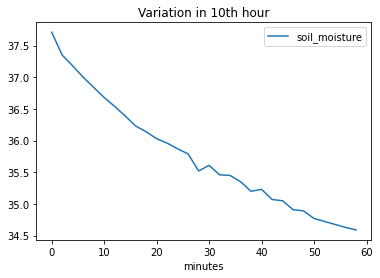

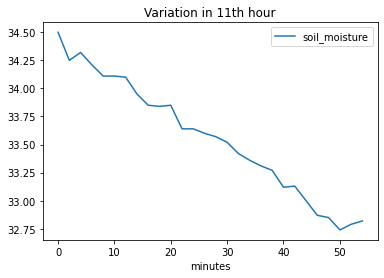

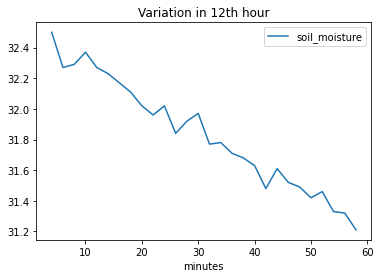

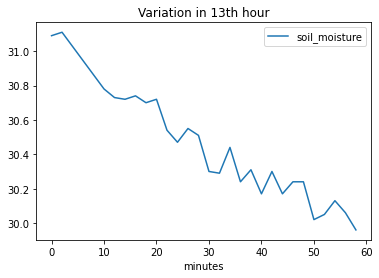

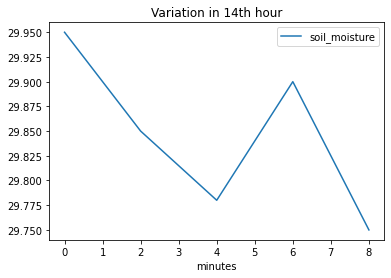

In [16]:
#lets go for the last day
df_26 = df[df['date']==26]

for val in sorted(list(df_26['hour'].unique())):
  filter = df_26['hour']==val

  df_26[filter].plot('minutes', 'soil_moisture')
  plt.title('Variation in {}th hour'.format(val))
  plt.show()

The pattern in the variation of the data is pretty much the same.

But, there was a sudden rise in the 14th hour which is kind of similar to the 16th hour of day 23.

This is pretty interesting.

Let's now move on to check the variation in soil temperature measured in degree Celsius

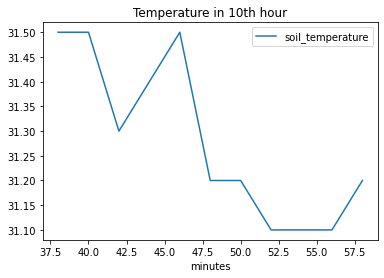

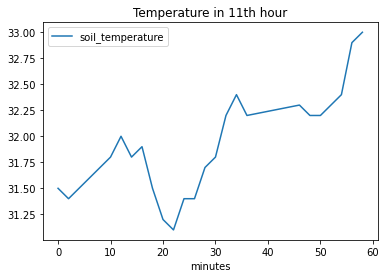

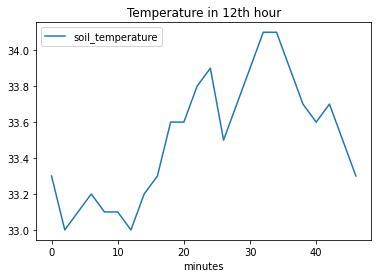

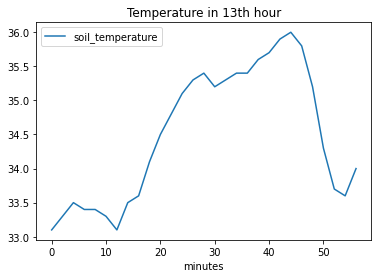

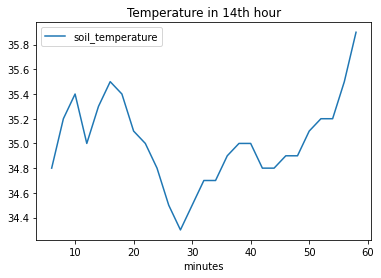

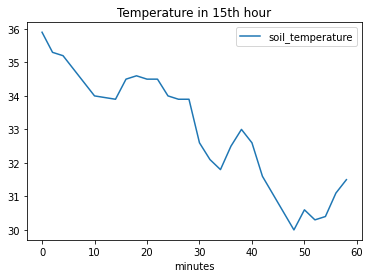

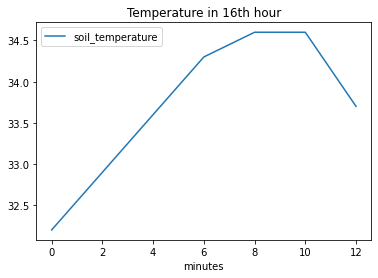

In [17]:
for val in sorted(list(df_23['hour'].unique())):
  filter = df_23['hour']==val

  df_23[filter].plot('minutes', 'soil_temperature')
  plt.title('Temperature in {}th hour'.format(val))
  plt.show()

Okay so there is a lot of variation in the temperature and it's pretty hard to understand any usefull information.

So I am in a fix now. Should I plot in some different way or just proceed to the spectrum columns. 🤔

Let's just try some other plot

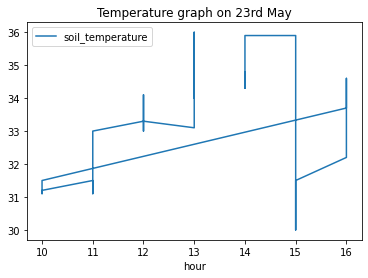

In [18]:
df_23.plot('hour', 'soil_temperature')
plt.title('Temperature graph on 23rd May')
plt.show()

Haha, I never saw such a graph before. 

This looks amazing but on the same note it's totally useless. :(

In [19]:
#lets get the highest temperature value
df_23['soil_temperature'].value_counts().sort_index()

30.0    1
30.3    1
30.4    1
30.6    1
31.1    5
31.2    4
31.3    1
31.4    4
31.5    7
31.6    2
31.7    2
31.8    4
31.9    1
32.0    1
32.1    1
32.2    5
32.3    2
32.4    2
32.5    1
32.6    2
32.9    2
33.0    4
33.1    5
33.2    2
33.3    5
33.4    2
33.5    4
33.6    6
33.7    5
33.8    1
33.9    6
34.0    3
34.1    3
34.3    3
34.5    6
34.6    3
34.7    2
34.8    5
34.9    3
35.0    4
35.1    3
35.2    6
35.3    4
35.4    5
35.5    2
35.6    1
35.7    1
35.8    1
35.9    3
36.0    1
Name: soil_temperature, dtype: int64

So the highest reached temperature value in the month of May is 36 degree celsius. Comparing that to India it's almost nothing. :)

Okay now, coming back. Let's check on which hours the temperatures bar reached it's highest value.

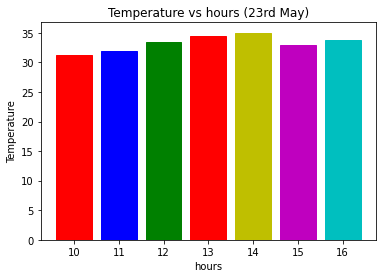

In [25]:
temp_means_23 = []
for val in sorted(list(df_23['hour'].unique())):
  temp_means_23.append(df_23[df_23['hour']==val]['soil_temperature'].mean())

barlist = plt.bar(sorted(list(df_23['hour'].unique())), temp_means_23)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')
barlist[3].set_color('r')
barlist[4].set_color('y')
barlist[5].set_color('m')
barlist[6].set_color('c')
plt.xlabel('hours')
plt.ylabel('Temperature')
plt.title('Temperature vs hours (23rd May)')
plt.show()

Now that's a good looking graph. 

It can be clearly seen that the temperature was least at 10'o clock in the morning and it rose to its maximum at 2'o clock in the afternoon.

-

Now lets move on to check the variation in the spectrum values.

This notebook is already stretched for too long and hence I decide to analyse only one of the columns(randomly choosing: 960 does it exist? Oh no it only have upto 950. So let's go for 926)

In [26]:
df.head()

,soil_moisture,soil_temperature,454,458,462,466,470,474,478,482,486,490,494,498,502,506,510,514,518,522,526,530,534,538,542,546,550,554,558,562,566,570,574,578,582,586,590,594,598,602,...,810,814,818,822,826,830,834,838,842,846,850,854,858,862,866,870,874,878,882,886,890,894,898,902,906,910,914,918,922,926,930,934,938,942,946,950,date,hour,minutes,seconds
0,33.51,34.8,0.082131,0.055863,0.050047,0.047925,0.047498,0.046464,0.046669,0.046834,0.047469,0.048608,0.049343,0.050321,0.051308,0.053237,0.054277,0.055914,0.057526,0.059340,0.060957,0.062543,0.064105,0.066158,0.067752,0.069538,0.071269,0.072890,0.075050,0.077273,0.078615,0.080797,0.082322,0.084873,0.086526,0.087896,0.089299,0.090783,0.091937,0.093224,...,0.146754,0.147211,0.147590,0.147860,0.148043,0.148273,0.148168,0.148306,0.148695,0.149169,0.149621,0.149989,0.150042,0.150073,0.150504,0.150803,0.150936,0.150901,0.150922,0.151156,0.151157,0.151944,0.152416,0.152719,0.153032,0.152900,0.152845,0.152615,0.152927,0.154240,0.155018,0.154725,0.154682,0.154275,0.153477,0.153929,23,14,6,17
1,33.49,35.2,0.079510,0.055326,0.049116,0.047579,0.046745,0.046833,0.046329,0.047021,0.047660,0.048272,0.049086,0.050255,0.051465,0.052758,0.054272,0.055413,0.057245,0.058795,0.060666,0.062129,0.063881,0.065639,0.067651,0.069088,0.070921,0.072938,0.074584,0.076384,0.078716,0.080225,0.082117,0.083903,0.085882,0.087423,0.088400,0.090014,0.090900,0.092436,...,0.145616,0.146163,0.146341,0.146592,0.146502,0.146817,0.147310,0.147750,0.147913,0.147479,0.147233,0.147689,0.148296,0.149031,0.149187,0.149416,0.149423,0.149916,0.149966,0.150217,0.150538,0.151034,0.151720,0.152391,0.152629,0.152848,0.152715,0.153102,0.153551,0.153590,0.153688,0.153370,0.154021,0.155543,0.156220,0.156727,23,14,8,17
2,33.46,35.4,0.080599,0.054065,0.049150,0.047537,0.046525,0.046032,0.046276,0.046886,0.047230,0.048611,0.049242,0.049904,0.051134,0.052349,0.053945,0.055273,0.057153,0.059028,0.060561,0.061880,0.063493,0.066001,0.067201,0.069135,0.071210,0.072657,0.074421,0.076661,0.078280,0.080071,0.082386,0.083938,0.085441,0.086862,0.088657,0.090307,0.091509,0.092728,...,0.146030,0.146272,0.146241,0.146188,0.146411,0.146690,0.146826,0.147014,0.147254,0.147352,0.147695,0.148217,0.148582,0.148506,0.148827,0.149458,0.149506,0.149884,0.149838,0.149699,0.149895,0.150394,0.151122,0.151932,0.152294,0.152802,0.152362,0.152158,0.153204,0.153942,0.154610,0.154629,0.155609,0.155545,0.154884,0.154485,23,14,10,17
3,33.33,35.0,0.078024,0.054972,0.049052,0.047920,0.046883,0.046775,0.046835,0.046996,0.047565,0.048465,0.048690,0.049916,0.051437,0.052027,0.054373,0.056050,0.057311,0.058920,0.060888,0.062372,0.064291,0.065244,0.067219,0.068842,0.070901,0.073285,0.074840,0.076867,0.078547,0.080383,0.081995,0.083849,0.085804,0.087126,0.088588,0.090112,0.091645,0.092668,...,0.146422,0.146825,0.146741,0.147157,0.147298,0.147334,0.147530,0.147954,0.147926,0.147875,0.148162,0.148225,0.148359,0.148621,0.148995,0.148676,0.149480,0.149579,0.149904,0.150083,0.150628,0.150957,0.151445,0.151797,0.152599,0.153193,0.153281,0.153990,0.154499,0.155012,0.154691,0.154643,0.155405,0.155918,0.157645,0.157824,23,14,12,17
4,33.32,35.3,0.079973,0.055335,0.049314,0.047373,0.047028,0.046963,0.046763,0.047051,0.048083,0.048178,0.048974,0.050070,0.051606,0.053044,0.054380,0.055813,0.057545,0.059343,0.061065,0.062529,0.064171,0.065473,0.067356,0.069320,0.071357,0.073242,0.074871,0.076984,0.078913,0.080763,0.082440,0.084656,0.086398,0.087801,0.089326,0.090583,0.091833,0.093451,...,0.146924,0.147060,0.147056,0.147302,0.147415,0.147568,0.148043,0.147987,0.147911,0.148019,0.148351,0.148772,0.149200,0.149460,0.149814,0.150180,0.150412,0.151085,0.151388,0.151563,0.151885,0.151788,0.151988,0.152256,0.152441,0.152833,0.152803,0.153085,0.153295,0.154230,0.155071,0.155624,0.156504,0.156859,0.156634,0.156176,23,14,14,17


In [27]:
#separating the required columns

df_926 = df[['soil_moisture', 'soil_temperature', '926', 'date', 'hour', 'minutes', 'seconds']]

df_926.head(2)

,soil_moisture,soil_temperature,926,date,hour,minutes,seconds
0,33.51,34.8,0.15424,23,14,6,17
1,33.49,35.2,0.15359,23,14,8,17


Let's first check the correlation between the columns

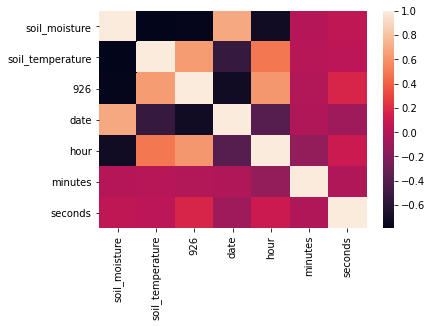

In [28]:
sns.heatmap(df_926.corr())

Okay so it looks like the spectrum values have a decent relation with the soil_temperature and hour columns.

Out of which the hour column is pretty clear since that's the value changing throughout the days. But still I will check if the spectrum value goes high or low with the hour.

In [0]:
# lets separate out one day
df_926_23 = df_926[df_926['date']==23]

Okay so I had a doubt on whether I can take a mean of spectrum values and use it as a representative?

So I looked up on google and found that its okay to take a mean until I am taking it for the same band which in this case is 926.

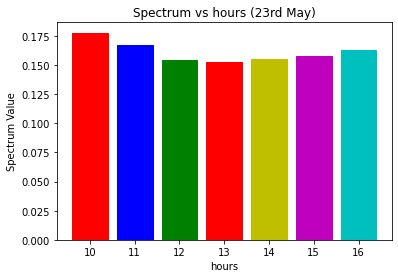

In [31]:
spec_means_23 = []
for val in sorted(list(df_926_23['hour'].unique())):
  spec_means_23.append(df_926_23[df_926_23['hour']==val]['926'].mean())

barlist = plt.bar(sorted(list(df_926_23['hour'].unique())), spec_means_23)
barlist[0].set_color('r')
barlist[1].set_color('b')
barlist[2].set_color('g')
barlist[3].set_color('r')
barlist[4].set_color('y')
barlist[5].set_color('m')
barlist[6].set_color('c')
plt.xlabel('hours')
plt.ylabel('Spectrum Value')
plt.title('Spectrum vs hours (23rd May)')
plt.show()

Okay so the graphs kind of remind me of a parabola.

The values were highest at 10 a.m. which is the first hour, decreased upto 1 p.m. and then again started increasing.

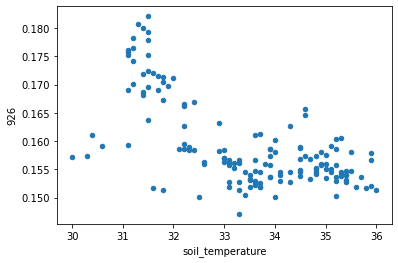

In [35]:
df_926_23.plot(x='soil_temperature', y='926', kind='scatter')

Looking into the scatterplot actually shows a different story. They are actually not that much related and I can see small clusters at around three places.

I am not delving any more deeper since I don't have much(almost 0) knowledge about this domain.

So ending my first data story here.

# See you. Bye bye.